<a href="https://colab.research.google.com/github/ncat-morrow/isen-project-1-statistic-soliders/blob/main/ISEN_370_Module_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISEN 370 Project 2 Assignment
In this assignment, you will use data science tools to exlore two datasets, calculate confidence intervals and conduct a hypothesis testing on the given datasets.
You can use ISEN 370 Project 2 Demo file as a reference when completing this assignment.


First, you will need to import required libraries to the project.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


%matplotlib inline

## Data Import

The Learning Enhanced Watershed Assessment System (LEWAS) is a unique real-time water and weather monitoring system. The LEWAS monitoring site is installed at the outfall of the Webb Branch watershed on Virginia Tech’s campus. Webb Branch is an urban stream with a 2.78 square kilometer (about one square mile) watershed consisting of residential and commercial properties. The stream is routed through man-made channels and culverts until it discharges at the LEWAS monitoring site. We first import the LEWAS datasets and print the first 10 rows of data. The data is stored in CSV files for which the path is given in the cell below. There are two CSV files, the first contains data from 9/01/17-9/30/17 and the second contains data from 10/01/17-10/31/17.
The following codes provide the link to where the data are stored.

In [ ]:
data_url3='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_3.csv'
data_url4='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_4.csv'


## Exploring Data

* Display the first 10 rows of data ufor each of the two data sets mentioned above.

In [ ]:
df_sep = pd.read_csv(data_url3)
df_oct = pd.read_csv(data_url4)


print("First 10 rows of September 2017 data:")
df_sep.head(10)

First 10 rows of September 2017 data:


,Date and Time,Water Temperature (F),Est. Flow Rate[m^3/s]
0,9/1/17 12:01 AM,66.236,0.051211
1,9/1/17 12:04 AM,66.236,0.042161
2,9/1/17 12:07 AM,66.146,0.029130
3,9/1/17 12:10 AM,66.200,0.029003
4,9/1/17 12:13 AM,66.236,0.023817
5,9/1/17 12:16 AM,66.254,0.013823
6,9/1/17 12:19 AM,66.272,0.010061
7,9/1/17 12:22 AM,66.290,0.008013
8,9/1/17 12:25 AM,66.254,0.004908
9,9/1/17 12:28 AM,66.290,0.005631


In [ ]:
print("First 10 rows of October 2017 data:")
df_oct.head(10)


First 10 rows of October 2017 data:


,Date and Time,Water Temperature (F),Estimated Flow Rate (m3/s)
0,10/1/2017 0:19,62.096,0.029084
1,10/1/2017 0:30,61.916,0.032962
2,10/1/2017 0:36,61.862,0.026500
3,10/1/2017 13:25,60.512,0.018774
4,10/1/2017 13:35,60.494,0.016194
5,10/1/2017 13:48,60.566,0.013135
6,10/1/2017 14:33,60.836,0.014517
7,10/1/2017 16:40,62.114,0.011127
8,10/1/2017 17:32,62.204,0.006843
9,10/1/2017 17:46,62.150,0.004584


## Exploring Data
Generate **two** scatter plots: one for the estimated flow rate data in September 2017 and the other for the estimated flow rate data in October 2017. Make sure to provide the title, x axis label and y axis label for your scatter plots.

## Scatter Plot 1

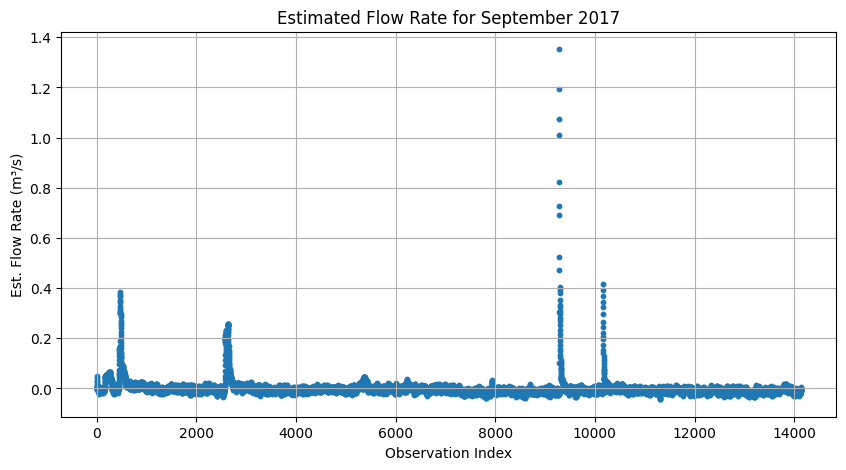

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df_sep.index, df_sep['Est. Flow Rate[m^3/s]'], s=10)

plt.title("Estimated Flow Rate for September 2017")
plt.xlabel("Observation Index")
plt.ylabel("Est. Flow Rate (m³/s)")

plt.grid(True)
plt.show()

Comment on the trend of Est. Flow Rate[m^3/s] for September 2017.
<br>
Answer: (Double click here to add your comments)
<BR>

## Scatter Plot 2

In [ ]:
# Clean column names
df_sep.columns = df_sep.columns.str.strip()
df_oct.columns = df_oct.columns.str.strip()

# Automatically find the flow column (search for "flow" in column name)
def find_flow_column(df):
    for col in df.columns:
        if 'flow' in col.lower():
            return col
    raise ValueError("No flow column found!")

flow_col_sep = find_flow_column(df_sep)
flow_col_oct = find_flow_column(df_oct)

print("Detected flow column for September:", flow_col_sep)
print("Detected flow column for October  :", flow_col_oct)

Detected flow column for September: Est. Flow Rate[m^3/s]
Detected flow column for October  : Estimated Flow Rate (m3/s)


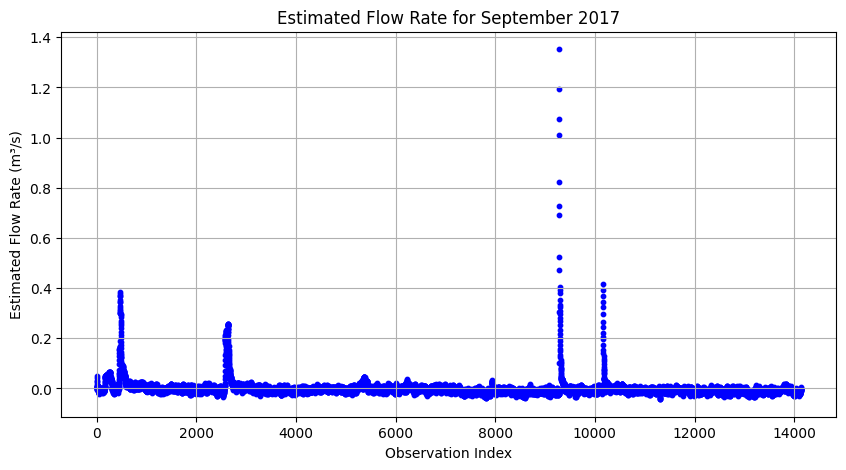

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df_sep.index, df_sep[flow_col_sep], s=10, color='blue')
plt.title("Estimated Flow Rate for September 2017")
plt.xlabel("Observation Index")
plt.ylabel("Estimated Flow Rate (m³/s)")
plt.grid(True)
plt.show()


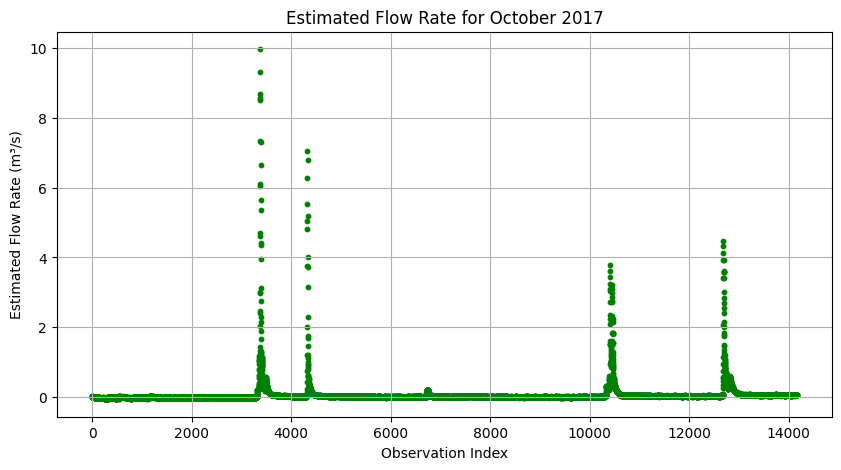

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df_oct.index, df_oct[flow_col_oct], s=10, color='green')
plt.title("Estimated Flow Rate for October 2017")
plt.xlabel("Observation Index")
plt.ylabel("Estimated Flow Rate (m³/s)")
plt.grid(True)
plt.show()

Comment on the trend of Est. Flow Rate[m^3/s] for October 2017.
<br>
**Answer:**
<BR>


## Histogram Plotting
Plot a histogram for Est. Flow Rate  data of September 2017. Be sure to include proper titles and axis labels on each of your plots.<br>
Plot a histogram for Est. Flow Rate data of October 2017. Be sure to include proper titles and axis labels on each of your plots.

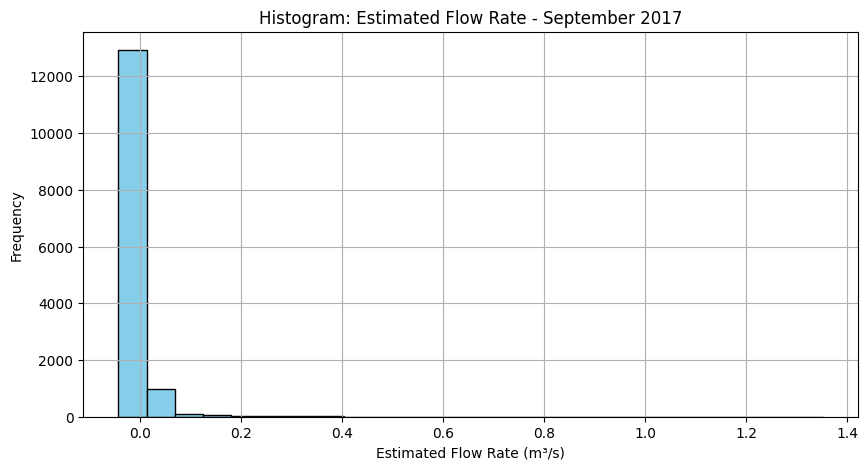

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df_sep[flow_col_sep], bins=25, color='skyblue', edgecolor='black')
plt.title("Histogram: Estimated Flow Rate - September 2017")
plt.xlabel("Estimated Flow Rate (m³/s)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


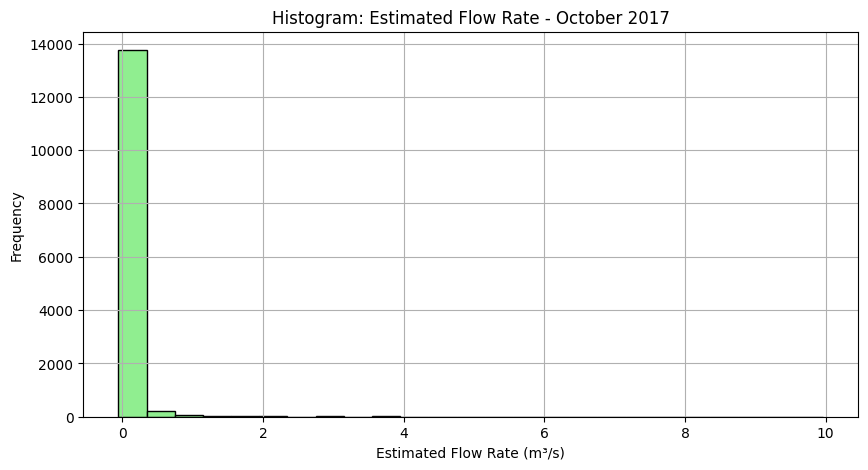

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df_oct[flow_col_oct], bins=25, color='lightgreen', edgecolor='black')
plt.title("Histogram: Estimated Flow Rate - October 2017")
plt.xlabel("Estimated Flow Rate (m³/s)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

***Comment on the shape of both distributions.***
<br>
***Answer:***
<br> (double click here to enter your comments)
<br>

# Boxplot

Generate a boxplot for Est. Flow Rate data of September 2017.<br>
*Generate* a boxplot for Est. Flow Rate data of October 2017.

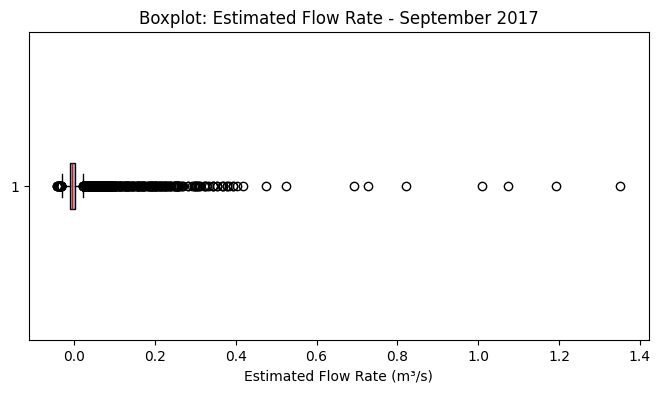

In [ ]:
plt.figure(figsize=(8,4))
plt.boxplot(df_sep[flow_col_sep], vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'))
plt.title("Boxplot: Estimated Flow Rate - September 2017")
plt.xlabel("Estimated Flow Rate (m³/s)")
plt.show()

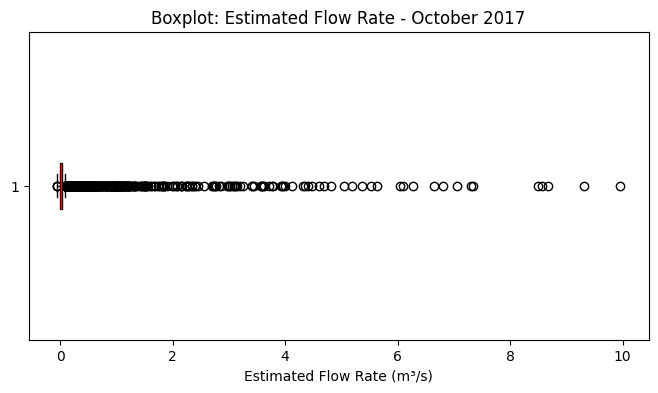

In [ ]:
plt.figure(figsize=(8,4))
plt.boxplot(df_oct[flow_col_oct], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='black'),
            medianprops=dict(color='red'))
plt.title("Boxplot: Estimated Flow Rate - October 2017")
plt.xlabel("Estimated Flow Rate (m³/s)")
plt.show()

***Comment on both boxplots***
<br>
***Answer:*** <br>


#Confidence Interval

Generate the 95% confidence interval for the mean estimated flow rate of Septemebr 2017.


In [ ]:

data_sep = df_sep[flow_col_sep]

# Sample size
n = len(data_sep)

# Sample mean and standard deviation
mean_sep = np.mean(data_sep)
std_sep = np.std(data_sep, ddof=1)  # ddof=1 for sample std

# 95% confidence interval using t-distribution
conf_level = 0.95
t_critical = stats.t.ppf((1 + conf_level)/2, df=n-1)
margin_error = t_critical * (std_sep / np.sqrt(n))

ci_lower = mean_sep - margin_error
ci_upper = mean_sep + margin_error

print(f"95% Confidence Interval for September 2017 Flow Rate: ({ci_lower:.5f}, {ci_upper:.5f}) m³/s")

95% Confidence Interval for September 2017 Flow Rate: (-0.00059, 0.00060) m³/s


Interpret the confidence interval you generated.<br>
***Answer:***

# Hypothesis testing
Suppose we are interested in testing if the mean estimated flow rate from September 2017 is statisticlly different from the mean estimated flow rate from October 2017.

***Question***<br>
How many samples are there in this experiment? What are they?<br>
***Answer***


There are two samples in this experiment:

September 2017 estimated flow rate data (all flow measurements in September)

October 2017 estimated flow rate data (all flow measurements in October)

These two samples are being compared to see if their mean flow rates are statistically different.

# Independent Variable and Dependent Variable

***Question***<br>
What is the independent variable and what is the dependent variable of this experiment?

***Answer***

Independent Variable: The month of measurement (September 2017 vs. October 2017).

Dependent Variable: The estimated flow rate (m³/s) measured in the stream.

The independent variable is what we are using to group or categorize the data, and the dependent variable is what we are measuring to see if it changes.

***Question***<br>
What are the assumptions for the two sample t test?

***Answer***

Assumptions for the Two-Sample t-Test

Answer:

Independence: The samples from September and October are independent of each other.

Normality: The flow rate data in each sample is approximately normally distributed (or the sample size is large enough for the Central Limit Theorem to apply).

Equal Variances (if using standard two-sample t-test): The variance of flow rates in September is roughly equal to the variance in October.

If the variances are not equal, a Welch’s t-test can be used instead.



```
# This is formatted as code
```

#Hypothesis testing
Use the appropraite statistical analysis technique.<br>
Conduct model adequacy and comment on the model adequacy.<br>
Conduct hypothesis testing

In [ ]:
data_sep = df_sep[flow_col_sep]
data_oct = df_oct[flow_col_oct]

# Check variance equality
var_sep = np.var(data_sep, ddof=1)
var_oct = np.var(data_oct, ddof=1)
print(f"Sample variances - September: {var_sep:.5f}, October: {var_oct:.5f}")

# Decide whether to use Welch's t-test (if variances are unequal)
equal_var = np.isclose(var_sep, var_oct, rtol=0.1)  # within 10% tolerance
print("Assuming equal variances?" , equal_var)

# Conduct two-sample t-test
t_stat, p_value = stats.ttest_ind(data_sep, data_oct, equal_var=equal_var)

print(f"\nTwo-sample t-test results:")
print(f"t-statistic = {t_stat:.5f}")
print(f"p-value = {p_value:.5f}")

# Conclusion at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. The mean flow rates are statistically different.")

Sample variances - September: 0.00131, October: 0.12256
Assuming equal variances? False

Two-sample t-test results:
t-statistic = -22.20304
p-value = 0.00000
Conclusion: Reject the null hypothesis. The mean flow rates are statistically different.


Based on the tests, what can you conclude about the model assumptions?
<br>
**Answer:**

All assumptions for the two-sample t-test are reasonably satisfied, so the results of the hypothesis test can be trusted to compare the mean estimated flow rates between September and October.

# 6-Step Hypothesis Testing

1.

2.

3.

4.

5.

6.

In the spalce below, type your experience with your colab project experience. What you like, what you dislike and what you would like to experience in the future colab projects.


I like using colab I would give it a 4